In [5]:
%matplotlib inline
import pandas as pd
import numpy as np

train = pd.read_csv('knn_train.csv')   # better be in the correct directory!
test = pd.read_csv('knn_test.csv')

In [6]:
train.head(10)

,shoe size,height,class
0,8.518110,73.029460,seniors
1,10.301527,68.959677,seniors
2,7.386575,73.558042,seniors
3,9.477281,68.195558,seniors
4,10.910389,75.144672,seniors
5,8.250202,75.996389,seniors
6,6.815541,79.560421,seniors
7,8.911968,63.614433,seniors
8,9.991433,66.068581,seniors
9,9.240619,73.401884,seniors


In [7]:
train.tail(10)

,shoe size,height,class
440,5.558711,60.859523,fourth
441,6.755368,61.406296,fourth
442,7.729694,56.542935,fourth
443,7.935688,54.670780,fourth
444,7.721872,59.078631,fourth
445,6.790728,56.506263,fourth
446,6.671880,51.081101,fourth
447,6.904876,59.823496,fourth
448,6.281759,56.523309,fourth
449,6.407946,54.540642,fourth


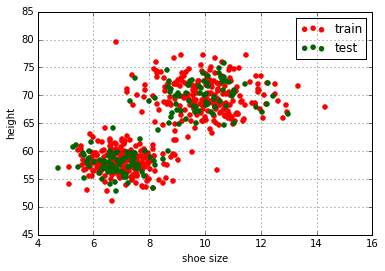

In [8]:
ax = train.plot(kind='scatter', x='shoe size', y='height', color='Red', label='train');
test.plot(kind='scatter', x='shoe size', y='height', color='DarkGreen', label='test', ax=ax)

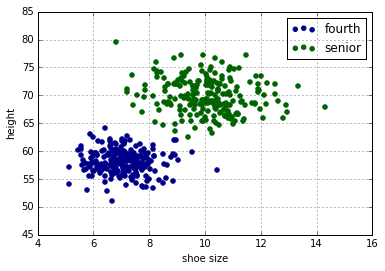

In [19]:
ax2 = train[train['class'] == 'fourth'].plot(kind='scatter', x='shoe size', y='height', color='DarkBlue', label='fourth');
train[train['class'] == 'seniors'].plot(kind='scatter', x='shoe size', y='height', color='DarkGreen', label='senior', ax = ax2);

In [9]:
from sklearn.neighbors import KNeighborsClassifier

cols = ['shoe size', 'height']
cols2 = ['class']
trainArr = train.as_matrix(cols)
trainRes = train.as_matrix(cols2)

testArr = test.as_matrix(cols)
testRes = test.as_matrix(cols2)

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(trainArr, trainRes)

output = knn.predict(testArr)

# or predict on a specific example!
print(knn.predict(testArr[0]))
print(testRes[0])                # a match!

['seniors']
['seniors']


/Users/cathyoneil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [10]:
correct = 0.0

for i in range(len(output)): 
    if testRes[i][0] == output[i]: 
        correct += 1
    
correct / len(output)

0.9933333333333333

What if we changed the scale? Instead of height in inches, let's look at height in a larger unit.

In [11]:
train['alt height'] = train['height']/100000.0

In [12]:
train.head()

,shoe size,height,class,alt height
0,8.518110,73.029460,seniors,0.000730
1,10.301527,68.959677,seniors,0.000690
2,7.386575,73.558042,seniors,0.000736
3,9.477281,68.195558,seniors,0.000682
4,10.910389,75.144672,seniors,0.000751


In [13]:
test['alt height'] = test['height']/100000.0

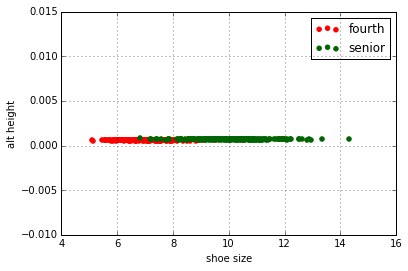

In [15]:
ax2 = train[train['class'] == 'fourth'].plot(kind='scatter', x='shoe size', y='alt height', color='Red', label='fourth');
train[train['class'] == 'seniors'].plot(kind='scatter', x='shoe size', y='alt height', color='DarkGreen', label='senior', ax = ax2);

In [16]:
altcols = ['shoe size', 'alt height']
cols2 = ['class']
alttrainArr = train.as_matrix(altcols)
alttrainRes = train.as_matrix(cols2)

alttestArr = test.as_matrix(altcols)
alttestRes = test.as_matrix(cols2)

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(alttrainArr, alttrainRes)

output = knn.predict(alttestArr)

# or predict on a specific example!
print(knn.predict(alttestArr[0]))
print(alttestRes[0]) 

['seniors']
['seniors']


/Users/cathyoneil/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [17]:
correct = 0.0

for i in range(len(output)): 
    if alttestRes[i][0] == output[i]: 
        correct += 1
    
correct / len(output)

0.9266666666666666